## Estudiante: Steven Jimenez

In [52]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer 
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from IPython import display
%matplotlib inline

# Importar Raw Data
El siguiente data set describe las caracteristicas (features) del agua que la hacen potable o no potable (etiquetas). https://www.kaggle.com/adityakadiwal/water-potability

In [53]:
# Importar Raw Data
# https://www.kaggle.com/adityakadiwal/water-potability
dataset = pd.read_csv('water_potability.csv')
print("Dimensiones del dataset", dataset.shape)
print("******************************************************")
print("Cantidad de elementos NaN por columna")
print(dataset.isna().sum())
print("******************************************************")
print("Visualizacion de los primeros elementos del dataset")
dataset.head()

Dimensiones del dataset (3276, 10)
******************************************************
Cantidad de elementos NaN por columna
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
******************************************************
Visualizacion de los primeros elementos del dataset


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Tecnica de sustitucion de valores faltantes.

In [54]:
dataset.fillna(dataset.mean(), inplace = True)
print("Cantidad de elementos NaN por columna")
print(dataset.isna().sum())
print("******************************************************")
print("Se observa que los NaN han sido eliminados")
dataset.head(n=100)



Cantidad de elementos NaN por columna
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
******************************************************
Se observa que los NaN han sido eliminados


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
95,6.140878,197.876090,26687.874483,7.587196,329.231853,548.072761,15.836330,41.263648,5.359460,0
96,7.077874,220.670540,23873.378210,6.181840,341.987234,333.050786,10.661799,90.297770,4.764508,0
97,5.488314,135.802362,21485.153195,8.187416,280.603287,441.331137,14.860263,88.287346,5.066786,0
98,7.205559,120.327615,24627.867560,6.202469,289.768697,418.433290,13.643147,63.733732,3.710053,0


# Exploración de datos

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff0bbb59d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff0bbb60d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff0bbb5670>,
 'medians': [<matplotlib.lines.Line2D at 0x1ff0bbb6790>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ff0bbb6af0>,
 'means': []}

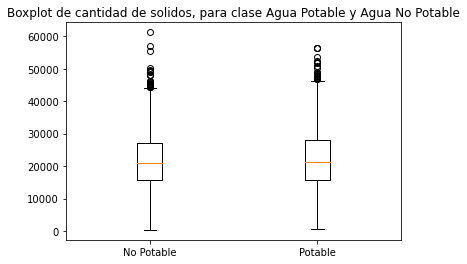

In [55]:
df = pd.DataFrame(dataset, columns= ['Solids','Potability'])
df.head()


x1= df[df['Potability']==0].iloc[:,0]#Agua no potable
x2= df[df['Potability']==1].iloc[:,0]#Agua potable


fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot de cantidad de solidos, para clase Agua Potable y Agua No Potable')
ax1.boxplot([x1, x2], labels=['No Potable','Potable'])





A primera impresión, el boxplot generado, no me define una fuerte relación entre la cantidad de sólidos en el agua y si el agua es potable o no. 

# Tecnica de deteccion/eliminacion de outliers.

Regla en distribucion normal:  Remover datos en (mean+2σ) y (mean−2σ)


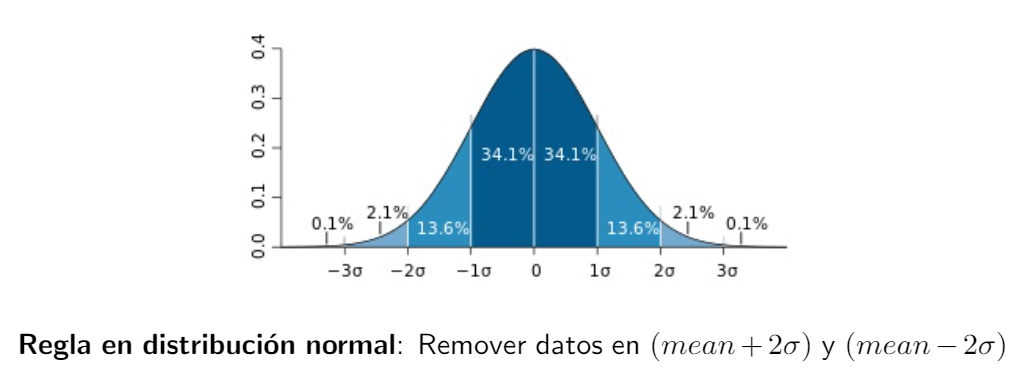

In [56]:
print("Regla en distribucion normal:  Remover datos en (mean+2σ) y (mean−2σ)")
display.Image("TP2outliers.png")


In [57]:

def removeOutlier(matrix,column):    
    print("################################################################")
    print("Evaluando valores de la columna#",column)
    columna = matrix[:,column] 
    mean = np.mean(columna, axis = 0)  
    print("Media",mean)
    sd = np.std(columna, axis = 0)
    print("Desviacion estandar",sd)
    i = 0
    itemToDelete = []
    upperLimit = mean + 2*sd
    lowerLimit = mean - 2*sd
    print("Rango de valores aceptables [",lowerLimit,",",upperLimit,"]")
    for k in columna:              
        if not (lowerLimit <= k <= upperLimit): 
            itemToDelete.append(i)            
        i = i +1
    
    print("Rows needed to be removed")
    for row in itemToDelete:       
        print("***************************************")            
        print("Outlier removido con valor",matrix[row,column]," en columna #",column)        
        print(matrix[row,:]) 
             
    matrix = np.delete(matrix,itemToDelete,0)             
    return matrix


#removeOutlier(dataset.to_numpy(),1)


datasetSinOutlier = dataset.to_numpy() 

for b in range(1,10):
    datasetSinOutlier = removeOutlier(datasetSinOutlier,b)    

print("#######################    FIN   ###################################")
print("#######################    FIN   ###################################")
print("#######################    FIN   ###################################")
print("Regla en distribuci ́on normal:  Remover datos en(mean+2σ)y(mean−2σ)")
print("Cantidad de outliers removidos",dataset.to_numpy().shape[0]-datasetSinOutlier.shape[0])
print("A continuacion se muestra el dataset sin outliers, descartados bajo el criterio de desviacion estandar ")
print(datasetSinOutlier)








################################################################
Evaluando valores de la columna# 1
Media 196.36949601730151
Desviacion estandar 32.87474281466433
Rango de valores aceptables [ 130.62001038797285 , 262.1189816466302 ]
Rows needed to be removed
***************************************
Outlier removido con valor 129.42292051494425  en columna # 1
[3.71608008e+00 1.29422921e+02 1.86300579e+04 6.63524588e+00
 3.33775777e+02 5.92885359e+02 1.51800131e+01 5.63290763e+01
 4.50065627e+00 0.00000000e+00]
***************************************
Outlier removido con valor 118.98857909025187  en columna # 1
[7.08079450e+00 1.18988579e+02 1.42855839e+04 7.80417355e+00
 2.68646941e+02 3.89375566e+02 1.27060490e+01 5.39288458e+01
 3.59501718e+00 0.00000000e+00]
***************************************
Outlier removido con valor 273.81380665980095  en columna # 1
[9.18156001e+00 2.73813807e+02 2.40413263e+04 6.90498973e+00
 3.98350517e+02 4.77974642e+02 1.33873408e+01 7.14573622e+01
 4.5

Outlier removido con valor 40936.15339124551  en columna # 2
[8.31002902e+00 2.12698276e+02 4.09361534e+04 7.70337474e+00
 3.01254422e+02 3.65431212e+02 1.29718690e+01 7.04852506e+01
 4.77578492e+00 0.00000000e+00]
***************************************
Outlier removido con valor 55334.70279929284  en columna # 2
[3.34458853e+00 1.56479927e+02 5.53347028e+04 8.53010158e+00
 3.71147770e+02 4.85631148e+02 1.69806100e+01 6.96224901e+01
 2.57514103e+00 0.00000000e+00]
***************************************
Outlier removido con valor 48410.471014066046  en columna # 2
[8.03743033e+00 1.48415309e+02 4.84104710e+04 4.75587969e+00
 2.68211896e+02 3.92901206e+02 1.24666097e+01 6.63962929e+01
 2.50623813e+00 1.00000000e+00]
***************************************
Outlier removido con valor 45141.68603638362  en columna # 2
[7.08079450e+00 1.42145566e+02 4.51416860e+04 6.03063996e+00
 2.40198505e+02 3.69280429e+02 2.06055521e+01 7.01683892e+01
 4.60472480e+00 1.00000000e+00]
*******************

***************************************
Outlier removido con valor 44982.73415473764  en columna # 2
[7.08079450e+00 2.09531697e+02 4.49827342e+04 8.89802398e+00
 3.33775777e+02 3.49385235e+02 1.56532987e+01 6.63962929e+01
 3.83247870e+00 0.00000000e+00]
***************************************
Outlier removido con valor 39995.18627184782  en columna # 2
[6.96820896e+00 1.78217311e+02 3.99951863e+04 8.93068900e+00
 3.37064950e+02 3.93676958e+02 1.42433735e+01 7.53757427e+01
 3.63264389e+00 0.00000000e+00]
***************************************
Outlier removido con valor 42310.82749816953  en columna # 2
[3.33762900e+00 2.16257087e+02 4.23108275e+04 8.13066329e+00
 3.33775777e+02 3.52264074e+02 1.40296727e+01 5.27609607e+01
 3.30019188e+00 0.00000000e+00]
***************************************
Outlier removido con valor 50793.898916874045  en columna # 2
[8.14034446e+00 1.53748170e+02 5.07938989e+04 7.84349772e+00
 3.06218950e+02 4.23455906e+02 1.43220189e+01 6.50766099e+01
 4.36279211

Outlier removido con valor 256.08951680458495  en columna # 4
[7.08079450e+00 2.53662037e+02 1.35682712e+04 9.22860286e+00
 2.56089517e+02 5.54573662e+02 1.37117375e+01 9.77140489e+01
 3.06703398e+00 0.00000000e+00]
***************************************
Outlier removido con valor 248.71196339107  en columna # 4
[5.40451067e+00 2.58903489e+02 1.01681765e+04 9.64819706e+00
 2.48711963e+02 3.96911214e+02 1.55122077e+01 6.58053308e+01
 3.99817589e+00 0.00000000e+00]
***************************************
Outlier removido con valor 433.6338999149112  en columna # 4
[7.07930352e+00 1.37007355e+02 2.42821548e+04 5.70569280e+00
 4.33633900e+02 3.42725318e+02 9.11394522e+00 8.83286048e+01
 5.55317384e+00 0.00000000e+00]
***************************************
Outlier removido con valor 418.4942436177372  en columna # 4
[7.08079450e+00 2.16271624e+02 2.69643172e+04 6.38354832e+00
 4.18494244e+02 5.73159591e+02 1.98926803e+01 5.01705225e+01
 4.50102454e+00 0.00000000e+00]
*********************

[5.09367513e+00 2.51313780e+02 3.02459570e+04 6.71882967e+00
 2.67026093e+02 2.71630738e+02 1.48824282e+01 7.07784081e+01
 4.55257144e+00 0.00000000e+00]
***************************************
Outlier removido con valor 416.2627986734816  en columna # 4
[5.26428380e+00 1.42534126e+02 2.55560531e+04 6.60078695e+00
 4.16262799e+02 4.43759231e+02 7.49136247e+00 7.28798478e+01
 5.10023966e+00 0.00000000e+00]
***************************************
Outlier removido con valor 405.8298937913429  en columna # 4
[7.97129875e+00 1.51032930e+02 2.98277940e+04 7.66215394e+00
 4.05829894e+02 3.76912212e+02 1.93827391e+01 7.81601333e+01
 2.43914001e+00 0.00000000e+00]
***************************************
Outlier removido con valor 406.4761192954583  en columna # 4
[7.66462810e+00 1.50667210e+02 3.39180408e+04 8.74629542e+00
 4.06476119e+02 4.36335622e+02 1.52169295e+01 6.63962929e+01
 3.48740688e+00 0.00000000e+00]
***************************************
Outlier removido con valor 407.4179772431

 3.26090685e+00 1.00000000e+00]
***************************************
Outlier removido con valor 112.6227330070513  en columna # 7
[9.15844516e+00 1.86672973e+02 1.57970304e+04 8.15108066e+00
 3.33812264e+02 4.25752018e+02 1.21826389e+01 1.12622733e+02
 4.52523673e+00 1.00000000e+00]
***************************************
Outlier removido con valor 107.18958400015964  en columna # 7
[7.75726967e+00 2.13048445e+02 2.52597805e+04 7.63515299e+00
 3.63684814e+02 5.43528799e+02 1.52540212e+01 1.07189584e+02
 4.16543229e+00 1.00000000e+00]
***************************************
Outlier removido con valor 29.468428123944623  en columna # 7
[7.06364698e+00 1.40612866e+02 1.79418113e+04 6.27530460e+00
 3.76046156e+02 4.02593602e+02 1.24397397e+01 2.94684281e+01
 3.39586624e+00 1.00000000e+00]
***************************************
Outlier removido con valor 20.337752642440933  en columna # 7
[8.88268445e+00 1.35523062e+02 4.85725381e+03 5.20977893e+00
 3.33775777e+02 5.32336659e+02 2.02962

Outlier removido con valor 98.96538914467112  en columna # 7
[7.00523014e+00 2.19921997e+02 2.65975864e+04 7.35102145e+00
 3.33583723e+02 3.79598806e+02 1.32846907e+01 9.89653891e+01
 3.58986576e+00 0.00000000e+00]
***************************************
Outlier removido con valor 14.343161445011162  en columna # 7
[7.78330561e+00 1.96815952e+02 2.47893547e+04 6.54849748e+00
 3.31036776e+02 3.72764982e+02 1.20661818e+01 1.43431614e+01
 5.04561963e+00 0.00000000e+00]
***************************************
Outlier removido con valor 104.23094917140682  en columna # 7
[6.82564704e+00 1.76841063e+02 1.28389144e+04 5.79242475e+00
 3.93798648e+02 4.47289115e+02 1.58213463e+01 1.04230949e+02
 2.80448038e+00 0.00000000e+00]
***************************************
Outlier removido con valor 111.11530965742848  en columna # 7
[4.63320252e+00 2.08908036e+02 2.93071289e+04 6.12558521e+00
 3.04031776e+02 4.56214828e+02 1.08171581e+01 1.11115310e+02
 4.75185882e+00 0.00000000e+00]
*****************

# Normalizacion de datos

In [58]:
print("Normalización de Features")
features = datasetSinOutlier[:,:-1]#Features del modelo
min_max_scaler = preprocessing.MinMaxScaler()
featuresNormalized = min_max_scaler.fit_transform(features)
print(featuresNormalized)

Normalización de Features
[[0.44946807 0.5648771  0.46586899 ... 0.20250636 0.83158704 0.18073965]
 [0.53049226 0.71266066 0.44029462 ... 0.6930422  0.50586863 0.21008269]
 [0.33038136 0.43824357 0.69665825 ... 0.05282126 0.32374281 0.05317514]
 ...
 [0.50739685 0.47827133 0.36547388 ... 0.92244702 0.50549179 0.12860028]
 [0.6355498  0.34236832 0.82447223 ... 0.25234624 0.56010481 0.28690137]
 [0.29399404 0.76130229 0.21042465 ... 0.26216447 0.68112078 0.73267768]]


In [59]:
print("Las clases de este dataset, No Potable ('0') o Potable ('1'), no son necesarias estandarizarlas porque son un caso de clasificación binaria")

Las clases de este dataset, No Potable ('0') o Potable ('1'), no son necesarias estandarizarlas porque son un caso de clasificación binaria
